# Introduction to Corpus Linguistics and Natural Language Processing

### COMM313 Spring 2018 (01/16/18)

* This notebook uses a matched corpus of speeches from the 2016 election campaign by Hillary Clinton and Donald Trump to highlight some the methods used in corpus linguistics and NLP.
* The small corpus used in this notebook consists of 13 speeches taken from the 2016 campaign that are matched for the two candidates.  

### Corpus linguistics

#### Methods
1. Frequency lists (word and phrase/n-gram)
2. Concordance (KWIC = keywords-in-context) listing
3. Collocation
4. Keyness


### Natural Language Processing (NLP)

#### Methods
1. Tokenization (sentence and word)
2. Part-of-speech (POS) tagging
3. Sentiment (lexicon) analysis
4. Dependency parsing (syntax) and Named Entity Recognition (with spaCY)

## Load modules 

* These `import` statements bring functionality into the current workspace
* You should usually group them in a section at the top of your notebook

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import os
import string
import pandas as pd
from collections import Counter

## The data

* In July 2016, Guichelaar and Du Mez wrote a blog piece: [_Donald Trump and Hillary Clinton, By Their Words_](
http://www.patheos.com/blogs/anxiousbench/2016/07/donald-trump-and-hillary-clinton-by-their-words/#DRxwDjSYtMbTXU4k.99)
* They used "seven roughly comparable speeches for each candidate, including their campaign launches" in the analysis:
 
    * __CLINTON__
    
        * http://time.com/4265947/hillary-clinton-aipac-speech-transcript/?iid=sr-link1
        * http://time.com/4378959/hillary-clinton-raleigh-speech-economy/?iid=sr-link1
        * http://time.com/3920332/transcript-full-text-hillary-clinton-campaign-launch/?iid=sr-link1
        * http://time.com/4367046/orlando-shooting-hillary-clinton-transcript/?iid=sr-link1
        * http://time.com/4364631/hillary-clinton-planned-parenthood-speech-transcript/?iid=sr-link1
        * http://time.com/4244178/super-tuesday-hillary-clinton-victory-speech-transcript-full-text/?iid=sr-link1
        * http://time.com/4361099/hillary-clinton-nominee-speech-transcript/?iid=sr-link1 
    
    * __TRUMP__ 
   
        * http://time.com/4267058/donald-trump-aipac-speech-transcript/?iid=sr-link1
        * http://time.com/4378270/donald-trump-hillary-clinton-foreign-policy-speech-transcript/?iid=sr-link1
        * http://time.com/3923128/donald-trump-announcement-speech/?iid=sr-link1
        * http://time.com/4367120/orlando-shooting-donald-trump-transcript/?iid=sr-link1
        * http://time.com/4245134/super-tuesday-donald-trump-victory-speech-transcript-full-text/?iid=sr-link1
        * http://time.com/4360872/donald-trump-new-jersey-victory-speech-transcript/?iid=sr-link1
        

* Text of these transcripts web pages was extracted an each one saved as a text file
    

In [3]:
os.listdir('/data/trump_clinton_speeches/TRUMP/')

['foreign_policy.txt',
 'AIPAC.txt',
 'victory.txt',
 'launch.txt',
 'orlando_shooting.txt',
 'super_tuesday.txt']

In [4]:
os.listdir('/data/trump_clinton_speeches/CLINTON/')

['economic.txt',
 'AIPAC.txt',
 'victory.txt',
 'planned_parenthood.txt',
 'launch.txt',
 'orlando_shooting.txt',
 'super_tuesday.txt']

## Basic text statistics

### Example working with a single file

1. load contents of text file into a string object and assign a pointer `trump_launch`
2. look at the first 500 characters
3. split into 'words' using whitespace (tokenize)
4. apply normalization (lowercase and strip punctuation) before tokenization

In [5]:
# load contents of text file
trump_launch = open('/data/trump_clinton_speeches/TRUMP/launch.txt').read()

In [6]:
len(trump_launch)  # number of characters in speech

34549

In [7]:
# show first 500 characters
trump_launch[:500]

'Wow. Whoa. That is some group of people. Thousands.\n\nSo nice, thank you very much. That’s really nice. Thank you. It’s great to be at Trump Tower. It’s great to be in a wonderful city, New York. And it’s an honor to have everybody here. This is beyond anybody’s expectations. There’s been no crowd like this.\n\nAnd, I can tell, some of the candidates, they went in. They didn’t know the air-conditioner didn’t work. They sweated like dogs.\n\nThey didn’t know the room was too big, because they didn’t h'

In [8]:
# print first 500 characters - will show formatting (line feeds, tabs etc.)
print(trump_launch[:500])

Wow. Whoa. That is some group of people. Thousands.

So nice, thank you very much. That’s really nice. Thank you. It’s great to be at Trump Tower. It’s great to be in a wonderful city, New York. And it’s an honor to have everybody here. This is beyond anybody’s expectations. There’s been no crowd like this.

And, I can tell, some of the candidates, they went in. They didn’t know the air-conditioner didn’t work. They sweated like dogs.

They didn’t know the room was too big, because they didn’t h


### Tokenization (version 1)

* Simplest way to token is to use the `split()` function to generate a list of 'words' using whitespace (spaces, tabs, linefeeds) as the delimiter

In [9]:
trump_launch_words = trump_launch.split()

In [10]:
# number of 'words' in the text
len(trump_launch_words)

6339

In [11]:
# show the first 20 words in text
trump_launch_words[:20]

['Wow.',
 'Whoa.',
 'That',
 'is',
 'some',
 'group',
 'of',
 'people.',
 'Thousands.',
 'So',
 'nice,',
 'thank',
 'you',
 'very',
 'much.',
 'That’s',
 'really',
 'nice.',
 'Thank',
 'you.']

In [12]:
trump_launch[:113]

'Wow. Whoa. That is some group of people. Thousands.\n\nSo nice, thank you very much. That’s really nice. Thank you.'

* These correspond to the first 113 characters in the string
* Both one or more spaces (` `) and other whitespace (e.g. linefeed ```\n```) used as the separator
* Notice that punctuation remains with the word it follows (e.g. _Wow**.**_, _nice**,**_)

In [13]:
# what counts as whitespace that is used by default in split() function?
string.whitespace

' \t\n\r\x0b\x0c'

In [14]:
example_text='''This is a     sentence, withsome
        interesting
                    use    of 
                    
                    
        whitespace'''

In [15]:
example_text

'This is a     sentence, withsome\n        interesting\n                    use    of \n                    \n                    \n        whitespace'

In [16]:
print(example_text)

This is a     sentence, withsome
        interesting
                    use    of 
                    
                    
        whitespace


In [17]:
example_text.split()

['This',
 'is',
 'a',
 'sentence,',
 'withsome',
 'interesting',
 'use',
 'of',
 'whitespace']

In [18]:
"This,is a sentence,with words,missing whitespace,between--other,words".split()

['This,is',
 'a',
 'sentence,with',
 'words,missing',
 'whitespace,between--other,words']

In [19]:
"This--I think--is an important point I'm sure I ain't hadn't anything of anyones'".split()

['This--I',
 'think--is',
 'an',
 'important',
 'point',
 "I'm",
 'sure',
 'I',
 "ain't",
 "hadn't",
 'anything',
 'of',
 "anyones'"]

### Frequency word list from simple tokenization

* Using this simple tokenization has implications with how items will be represented in a frequency list 
* The `Counter()` function from the `collections` package (which is accessed by the import statement `from collections import Counter` above) is a data structure that is really useful and simple for creating frequency lists
    1. initialize a new counter
        * `freq_list = Counter()`
    2. tally items in a list using the `.update([list])` function of the `Counter` object
        * `freq_list.update([1,1,1,3,4])`

In [20]:
freq_list = Counter()
freq_list.update([1,1,1,3,4])
freq_list

Counter({1: 3, 3: 1, 4: 1})

* Here we:
    1. create a new Counter object and point to it with the `freq` name 
    2. and then pass it our list of tokens from the Trump campaign launch speech
    3. show the 30 most common words in the speech

In [21]:
freq = Counter()
freq.update(trump_launch_words)
freq.most_common(30)

[('the', 226),
 ('I', 188),
 ('and', 155),
 ('a', 147),
 ('to', 145),
 ('of', 99),
 ('have', 97),
 ('that', 82),
 ('in', 72),
 ('And', 61),
 ('We', 59),
 ('we', 58),
 ('they', 56),
 ('it', 55),
 ('our', 52),
 ('you', 51),
 ('be', 47),
 ('They', 46),
 ('are', 46),
 ('is', 45),
 ('going', 43),
 ('don’t', 43),
 ('all', 40),
 ('I’m', 37),
 ('But', 35),
 ('for', 35),
 ('great', 34),
 ('not', 34),
 ('will', 32),
 ('because', 31)]

* Upper and lowercase versions of same word are different items in the list

#### Getting frequency of single item in `Counter`

* You can get the count for a specific item in the list using the square bracket notation, e.g.
    * `freq['the']`
    * `freq['and']`
    * `freq['country']`

In [22]:
 freq['And'], freq['and']

(61, 155)

In [23]:
freq['the'], freq['The']

(226, 4)

* Punctuation attached to a word creates a separate item in the list

In [24]:
freq['nice'], freq['nice.']

(9, 2)

### Tokenization (version 2)

* Before splitting on whitespace we can _normalize_ the text by stripping out `non-word` characters (e.g. punctuation) and switching to lowercase.
* The `string` module has a list of standard punctuation that can serve as a starting point in normalization
* String objects have a function called `translate` that can be applied to a string to replace a list of characters

In [25]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

* We can use the `.replace(<char(s)>, <replacement(s)>)` function on a string to replace a single character or series of characters

In [26]:
'abcdefabc'.replace('a','-')

'-bcdef-bc'

In [27]:
'abcdefabc'.replace('ab','')

'cdefc'

In [28]:
'abcaaa'.replace('a','x').replace('b','x')

'xxcxxx'

* But this can become tedious for a lot of replacements, e.g.
    * `'some-string!'.replace('!','').replace('"','').replace('$','').replace('$','').replace('%','')...` etc
    
* So we can use the `.translate()` function that takes a replacement table (a dictionary that maps from characters to their replacements)

In [29]:
help(str.translate)

Help on method_descriptor:

translate(...)
    S.translate(table) -> str
    
    Return a copy of the string S in which each character has been mapped
    through the given translation table. The table must implement
    lookup/indexing via __getitem__, for instance a dictionary or list,
    mapping Unicode ordinals to Unicode ordinals, strings, or None. If
    this operation raises LookupError, the character is left untouched.
    Characters mapped to None are deleted.



In [30]:
# translate() function needs a dictionary structure for the table of replacements
punc_replacements=str.maketrans('','',string.punctuation)

In [31]:
"This, has, (some) punctuation!!!".translate(punc_replacements)

'This has some punctuation'

* Dot functions on an object can be combined

In [32]:
trump_launch_tokens = trump_launch.lower().translate(punc_replacements).split()

In [33]:
trump_launch_tokens[:20]

['wow',
 'whoa',
 'that',
 'is',
 'some',
 'group',
 'of',
 'people',
 'thousands',
 'so',
 'nice',
 'thank',
 'you',
 'very',
 'much',
 'that’s',
 'really',
 'nice',
 'thank',
 'you']

* N.B. items not in the punctation list wil not be remove, e.g. `that’s` 

In [34]:
len(trump_launch_tokens)

6339

* Create a new frequency list with the updated tokenization

In [35]:
freq2 = Counter()
freq2.update(trump_launch_tokens)
freq2.most_common(30)

[('the', 230),
 ('and', 220),
 ('i', 188),
 ('a', 152),
 ('to', 146),
 ('we', 117),
 ('it', 107),
 ('they', 103),
 ('have', 100),
 ('that', 99),
 ('of', 99),
 ('you', 85),
 ('in', 79),
 ('our', 58),
 ('people', 53),
 ('are', 49),
 ('so', 48),
 ('be', 48),
 ('but', 47),
 ('don’t', 46),
 ('is', 45),
 ('know', 44),
 ('going', 44),
 ('all', 44),
 ('they’re', 44),
 ('it’s', 43),
 ('because', 40),
 ('not', 40),
 ('great', 38),
 ('i’m', 37)]

* Compare the top 20 items on each list to see difference between tokenization methods

In [36]:
list(zip(freq.most_common(20), freq2.most_common(20)))

[(('the', 226), ('the', 230)),
 (('I', 188), ('and', 220)),
 (('and', 155), ('i', 188)),
 (('a', 147), ('a', 152)),
 (('to', 145), ('to', 146)),
 (('of', 99), ('we', 117)),
 (('have', 97), ('it', 107)),
 (('that', 82), ('they', 103)),
 (('in', 72), ('have', 100)),
 (('And', 61), ('that', 99)),
 (('We', 59), ('of', 99)),
 (('we', 58), ('you', 85)),
 (('they', 56), ('in', 79)),
 (('it', 55), ('our', 58)),
 (('our', 52), ('people', 53)),
 (('you', 51), ('are', 49)),
 (('be', 47), ('so', 48)),
 (('They', 46), ('be', 48)),
 (('are', 46), ('but', 47)),
 (('is', 45), ('don’t', 46))]

### Tokenize Clinton and Trump corpora

* We can define a function that will take a filename, load the text from the file, apply normalization and tokenize

In [187]:
def tokenize(filename):
    '''
    create a normalized (lowercase and stripped punctuation) list of tokens from a text file
    
    Arguments:
        filename -- path to a text file
        
    Returns:
        list of tokens
    '''
    text = open(filename).read()
    text_normalized = text.lower().translate(punc_replacements)
    tokens = text_normalized.split()
    
    return tokens

* Tokenize all files in the Trump corpus

In [188]:
trump_speeches_dir = '/data/trump_clinton_speeches/TRUMP'
trump_speeches_list = os.listdir(trump_speeches_dir)
trump_speeches_list

['foreign_policy.txt',
 'AIPAC.txt',
 'victory.txt',
 'launch.txt',
 'orlando_shooting.txt',
 'super_tuesday.txt']

* We use a data structure in a dictionary (a key-value structure) that we will learn more about soon. But it can be thought of as a file cabinent with one draw for each file and the contents of a draw is the list of tokens.

In [189]:
trump_tokens = {}

for speech in trump_speeches_list:
    speech_id = 'trump_'+speech[:-4]
    trump_tokens[speech_id] = tokenize(os.path.join(trump_speeches_dir, speech))
    

* The __keys__ of the dictionary can be listed with the `.keys()` function 

In [195]:
print('\n'.join(trump_tokens.keys()))

trump_foreign_policy
trump_AIPAC
trump_victory
trump_launch
trump_orlando_shooting
trump_super_tuesday


* Show the first 50 tokens in the Trump capaign launch speech

In [196]:
trump_tokens['trump_launch'][:50]

['wow',
 'whoa',
 'that',
 'is',
 'some',
 'group',
 'of',
 'people',
 'thousands',
 'so',
 'nice',
 'thank',
 'you',
 'very',
 'much',
 'that’s',
 'really',
 'nice',
 'thank',
 'you',
 'it’s',
 'great',
 'to',
 'be',
 'at',
 'trump',
 'tower',
 'it’s',
 'great',
 'to',
 'be',
 'in',
 'a',
 'wonderful',
 'city',
 'new',
 'york',
 'and',
 'it’s',
 'an',
 'honor',
 'to',
 'have',
 'everybody',
 'here',
 'this',
 'is',
 'beyond',
 'anybody’s',
 'expectations']

* Tabulate the number of tokens in each of the 6 Trump speeches

In [41]:
word_cnt=0
for speech, tokens in trump_tokens.items():
    speech_wcnt = len(tokens)
    print("{:<30}{}".format(speech,speech_wcnt))
    word_cnt += speech_wcnt
    
print("="*35)
print("{:<30}{}".format(" ", word_cnt))

trump_foreign_policy          4405
trump_AIPAC                   2441
trump_victory                 1843
trump_launch                  6339
trump_orlando_shooting        4274
trump_super_tuesday           6128
                              25430


* We can do the same with the 7 Clinton speeches

In [42]:
clinton_speeches_dir = '/data/trump_clinton_speeches/CLINTON'
clinton_speeches_list = os.listdir(clinton_speeches_dir)
clinton_speeches_list

['economic.txt',
 'AIPAC.txt',
 'victory.txt',
 'planned_parenthood.txt',
 'launch.txt',
 'orlando_shooting.txt',
 'super_tuesday.txt']

In [197]:
clinton_tokens = {
 'clinton_'+speech[:-4]:tokenize(os.path.join(clinton_speeches_dir,speech))
 for speech in clinton_speeches_list
}

In [198]:
for speech, tokens in clinton_tokens.items():
    print("{:<30}{}".format(speech,len(tokens)))

word_cnt = sum(len(tokens) for tokens in clinton_tokens.values())

print("{}\n{:<30}{}".format("="*35, " ", word_cnt))

clinton_economic              5709
clinton_AIPAC                 3373
clinton_victory               1693
clinton_planned_parenthood    2788
clinton_launch                4712
clinton_orlando_shooting      3171
clinton_super_tuesday         1500
                              22946


### Create frequency lists

* Loop over each key in the `trump_tokens` dictionary and update a `Counter` with the list of tokens

In [199]:
trump_word_dist = Counter()
for speech in trump_tokens:
    trump_word_dist.update(trump_tokens[speech])
    
trump_word_dist.most_common(20)

[('the', 986),
 ('and', 876),
 ('to', 840),
 ('i', 504),
 ('a', 493),
 ('of', 476),
 ('we', 395),
 ('in', 353),
 ('you', 335),
 ('that', 321),
 ('have', 315),
 ('it', 304),
 ('our', 266),
 ('is', 250),
 ('going', 233),
 ('they', 225),
 ('be', 208),
 ('for', 192),
 ('people', 183),
 ('but', 164)]

In [200]:
clinton_word_dist = Counter()
for speech in clinton_tokens:
    clinton_word_dist.update(clinton_tokens[speech])

clinton_word_dist.most_common(20)

[('and', 948),
 ('to', 869),
 ('the', 852),
 ('of', 432),
 ('a', 393),
 ('we', 389),
 ('in', 378),
 ('that', 351),
 ('i', 288),
 ('for', 273),
 ('our', 268),
 ('you', 218),
 ('applause', 214),
 ('have', 202),
 ('it', 177),
 ('is', 174),
 ('all', 147),
 ('are', 145),
 ('be', 141),
 ('with', 135)]

## Defintions

* **TOKENS** is the number of 'words' in a tokenized text/corpus 
    * e.g. _'to be or not to be'_ has 6 tokens
* **TYPES** is the number of different (or distinct) words in a text/corpus
    * e.g. _'to be or not to be'_ has 4 tokens (to, be, or, not)
    
* **TYPE-TOKEN RATIO (TTR)** is a measure of vocabulary diversity (it is highly dependent on text length)

In [210]:
clinton_num_types = len(clinton_word_dist)
clinton_num_tokens = sum(clinton_word_dist.values())

print("Clinton type-token ratio\n\nTypes: {}\nTokens: {}\nTTR: {}".format(clinton_num_types, 
                                                                        clinton_num_tokens, 
                                                                        clinton_num_types/clinton_num_tokens))

Clinton type-token ratio

Types: 3489
Tokens: 22946
TTR: 0.15205264534123594


In [211]:
trump_num_types = len(trump_word_dist)
trump_num_tokens = sum(trump_word_dist.values())

print("Trump type-token ratio\n\nTypes: {}\nTokens: {}\nTTR: {}".format(trump_num_types, 
                                                                        trump_num_tokens, 
                                                                        trump_num_types/trump_num_tokens))

Trump type-token ratio

Types: 2997
Tokens: 25430
TTR: 0.11785292961069603


### Normalize frequencies

* Frequency normalization scales frequency counts using the total number of tokens in a text/corpus
* It allows comparison between the frequency of items in texts/corpora of different size
    * e.g. if _YOU_ occurs 10 times in a text with 500 words and 20 times in a text with 1000 words the normalized frequencies are the same:
        * normalized frequencies (per 1000 words)
            * (10 / 500)*1000 = 20
            * (20 / 1000)*1000 = 20

In [217]:
clinton_word_list = list(clinton_word_dist.items())
clinton_word_list.sort(key=lambda x:x[1], reverse=True)
clinton_df=pd.DataFrame.from_records(clinton_word_list, columns=['item','frequency'])
clinton_df['per1000'] = clinton_df.frequency / clinton_num_tokens * 1000
clinton_df.head(20)

,item,frequency,per1000
0,and,948,41.314390
1,to,869,37.871524
2,the,852,37.130655
3,of,432,18.826811
4,a,393,17.127168
5,we,389,16.952846
6,in,378,16.473459
7,that,351,15.296784
8,i,288,12.551207
9,for,273,11.897498


* Plot of frequency distribution shows the characteristic _long-tailed_ distribution (a power law)

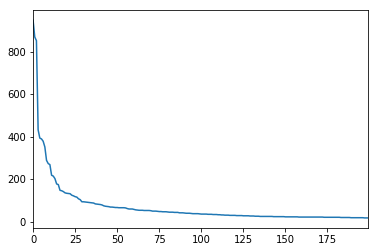

In [50]:
clinton_df[:200].frequency.plot()

In [220]:
trump_word_list = list(trump_word_dist.items())
trump_word_list.sort(key=lambda x:x[1], reverse=True)
trump_df=pd.DataFrame.from_records(trump_word_list, columns=['item','frequency'])
trump_df['per1000'] = trump_df.frequency / trump_num_tokens * 1000
trump_df.head(20)

,item,frequency,per1000
0,the,986,38.773103
1,and,876,34.447503
2,to,840,33.031852
3,i,504,19.819111
4,a,493,19.386551
5,of,476,18.718050
6,we,395,15.532835
7,in,353,13.881243
8,you,335,13.173417
9,that,321,12.622886


### Shared vocabulary

* Create a frequency list that contains words that are in both Trump and Clinton speeches
* Columns for raw frequency counts in each corpus as well as normalized frequency columns

In [221]:
shared_vocab = [(item, value, clinton_word_dist.get(item)) 
                for item,value in trump_word_dist.items() if clinton_word_dist.get(item)]

In [224]:
shared_vocab.sort(key=lambda i: i[1]+i[2], reverse=True)
cdf=pd.DataFrame(shared_vocab, columns=['word','Trump','Clinton'])
cdf['Trump_percent']=cdf.Trump / trump_num_tokens * 100
cdf['Clinton_percent']=cdf.Clinton / clinton_num_tokens * 100

In [226]:
cdf.head(10)

,word,Trump,Clinton,Trump_percent,Clinton_percent
0,the,986,852,3.877310,3.713065
1,and,876,948,3.444750,4.131439
2,to,840,869,3.303185,3.787152
3,of,476,432,1.871805,1.882681
4,a,493,393,1.938655,1.712717
5,i,504,288,1.981911,1.255121
6,we,395,389,1.553284,1.695285
7,in,353,378,1.388124,1.647346
8,that,321,351,1.262289,1.529678
9,you,335,218,1.317342,0.950057


* Select **believe** row from frequency table

In [227]:
cdf[cdf.word=='believe']

,word,Trump,Clinton,Trump_percent,Clinton_percent
105,believe,38,39,0.14943,0.169964


* Select a number of rows using a list

In [228]:
cdf[cdf.word.isin(['believe','country','going'])]

,word,Trump,Clinton,Trump_percent,Clinton_percent
26,going,233,40,0.916241,0.174322
34,country,117,59,0.460087,0.257125
105,believe,38,39,0.149430,0.169964


In [107]:
cdf.iloc[:50]

,word,Trump,Clinton,Trump_percent,Clinton_percent
0,the,986,852,3.877310,3.713065
1,and,876,948,3.444750,4.131439
2,to,840,869,3.303185,3.787152
3,of,476,432,1.871805,1.882681
4,a,493,393,1.938655,1.712717
5,i,504,288,1.981911,1.255121
6,we,395,389,1.553284,1.695285
7,in,353,378,1.388124,1.647346
8,that,321,351,1.262289,1.529678
9,you,335,218,1.317342,0.950057


#### Reorder shared frequency table by items more frequent in Trump than Clinton speeches

In [252]:
cdf.iloc[cdf.Trump_percent.subtract(cdf.Clinton_percent).sort_values(ascending=False).index].head(20)

,word,Trump,Clinton,Trump_percent,Clinton_percent
26,going,233,40,0.916241,0.174322
5,i,504,288,1.981911,1.255121
12,it,304,177,1.195438,0.771376
17,they,225,107,0.884782,0.466312
48,very,126,18,0.495478,0.078445
9,you,335,218,1.317342,0.950057
11,have,315,202,1.238694,0.880328
47,i’m,119,29,0.467951,0.126384
30,it’s,149,57,0.585922,0.248409
22,people,183,93,0.719622,0.405299


* This table shows the 20 words with the largest difference between frequnecy of usage by Trump compared to Clinton. 
* This is calculated as:
    * `Trump_percent - Clinton_percent`
    
* So Trump uses words such as _going_, _i_, _it_, _they_, _very_ and _you_ more frequently than Clinton does.
* N.B. that the tokenization did not capture and remove the mdash (`—`) which is seen in both sets of speeches (Trump 122 and Clinton 44 times)
    

#### Reorder shared frequency table by items more frequent in Clinton than Trump speeches

In [251]:
cdf.iloc[cdf.Clinton_percent.subtract(cdf.Trump_percent).sort_values(ascending=False).index].head(20)

,word,Trump,Clinton,Trump_percent,Clinton_percent
1,and,876,948,3.444750,4.131439
2,to,840,869,3.303185,3.787152
13,for,192,273,0.755014,1.189750
15,applause,153,214,0.601652,0.932624
32,as,63,132,0.247739,0.575264
8,that,321,351,1.262289,1.529678
7,in,353,378,1.388124,1.647346
106,women,10,67,0.039324,0.291990
71,work,32,81,0.125836,0.353003
121,–,10,59,0.039324,0.257125


* This table shows the 20 words with the largest difference between frequnecy of usage by Clinton compared to Trump. 
* This is calculated as:
    * `Clinton_percent - Trump_percent `
    
* So Clinton uses words such as _as_, _women_, _it_, _work_, _together_, _families_ and _americans_ more frequently than Clinton does.
* N.B. that the tokenization did not capture and remove the dash (`–`) which is seen in both sets of speeches (Trump 10 and Clinton 59 times).
    

### Plot shared vocabulary in Clinton and Trump speeches

* We can try and represent this information in a graphical format as well.
* Using a scatter plot each word is positioned as
    * `x = relative frequency in Trump speeches `
    * `y = relative frequency in Clinton speeches`
* The size of the word represents the relative frequency of the larger of the two values (i.e. Trump_percent or Clinton_percent)
* A plot of the entire shared vocabulary would be very difficult to read, so we use create a flexible function `plot_shared_vocab()` that takes the shared vocab table as the start and end row numbers to use in the plot, e.g.
    * `plot_shared_vocab(cdf, 10, 20)`
 
* will plot the following rows from the table

In [253]:
cdf[10:20]

,word,Trump,Clinton,Trump_percent,Clinton_percent
10,our,266,268,1.046009,1.167960
11,have,315,202,1.238694,0.880328
12,it,304,177,1.195438,0.771376
13,for,192,273,0.755014,1.189750
14,is,250,174,0.983091,0.758302
15,applause,153,214,0.601652,0.932624
16,be,208,141,0.817932,0.614486
17,they,225,107,0.884782,0.466312
18,this,159,133,0.625246,0.579622
19,are,145,145,0.570193,0.631918


In [254]:
cdf.columns

Index(['word', 'Trump', 'Clinton', 'Trump_percent', 'Clinton_percent'], dtype='object')

In [334]:
def plot_shared_vocab(cdf, start=5, end=100):
    '''Create a text scatter plot representing the differences in usage frequency of shared vocabulary
    
    Args:
        cdf   -- a data frame containing columns ['word', 'Trump', 'Clinton', 'Trump_percent', 'Clinton_percent']
        start -- index of first row from table to use (default = 5)
        end   -- index of last row to include (default=100) - N.B. means last row will be end-1
        
    '''
    
    def scaler(values):
        vmin=min(values)
        vmax=max(values)

        scaled_values = [(v-vmin)/(vmax-vmin)for v in values]
        return scaled_values
    
    with plt.style.context('seaborn-paper'):

        fig = plt.figure(figsize=(18,12))

        ax_max = cdf.iloc[start:end][['Trump_percent','Clinton_percent']].max().max()
        ax_min = cdf.iloc[start:end][['Trump_percent','Clinton_percent']].min().min()
        
        cdf['text_size'] = scaler(cdf.Trump_percent.add(cdf.Clinton_percent))

        for row in cdf[start:end].itertuples():
            plt.text(row.Trump_percent*.8, row.Clinton_percent*.8, row.word, 
                     color='#0000FF', 
                     size=200*row.text_size,
                     ha='center', va='center', alpha=0.3)

        plt.axis([0, ax_max, 0, ax_max])
        plt.plot((0,ax_max),(0,ax_max)) #, color='#A0A0A0')

        plt.xticks([])
        plt.yticks([])
        plt.xlabel('Use in Trump speeches (% of tokens)', fontsize=20)
        plt.ylabel('Use in Clinton speeches (% of tokens)', fontsize=20)

        plt.show()

#### Example plot

* The follow plot shows rows 5 through 99, i.e. _i_, _we_, _in_, _that_... through to _should_, _say_, _hillary_ and _states_

In [260]:
cdf[5:100].head()

,word,Trump,Clinton,Trump_percent,Clinton_percent
5,i,504,288,1.981911,1.255121
6,we,395,389,1.553284,1.695285
7,in,353,378,1.388124,1.647346
8,that,321,351,1.262289,1.529678
9,you,335,218,1.317342,0.950057


In [259]:
cdf[5:100].tail()

,word,Trump,Clinton,Trump_percent,Clinton_percent
95,her,51,31,0.200551,0.135100
96,should,17,65,0.066850,0.283274
97,say,59,23,0.232009,0.100235
98,hillary,71,9,0.279198,0.039223
99,states,49,31,0.192686,0.135100


* The position on the x-axis represents the relative frequency (per 100 words) in Trump speeches while the position on the y-axis the relative frequency in the Clinton speeces.
* So words that fall around the diagonal line have around the same relative frequency
* Words that fall in the bottom right, lower triangle are more frequent in the Trump speeches compared to the Clinton ones.
* Conversely, words in the top right, upper triangle are more frequent in the Clinton speeches compared to the Trump ones.
* This suggests, for instance, that _i_, _going_, _very_ are very Trump distinctive and _you_, _have_, _it_, etc. are somewhat Trump distinctive.

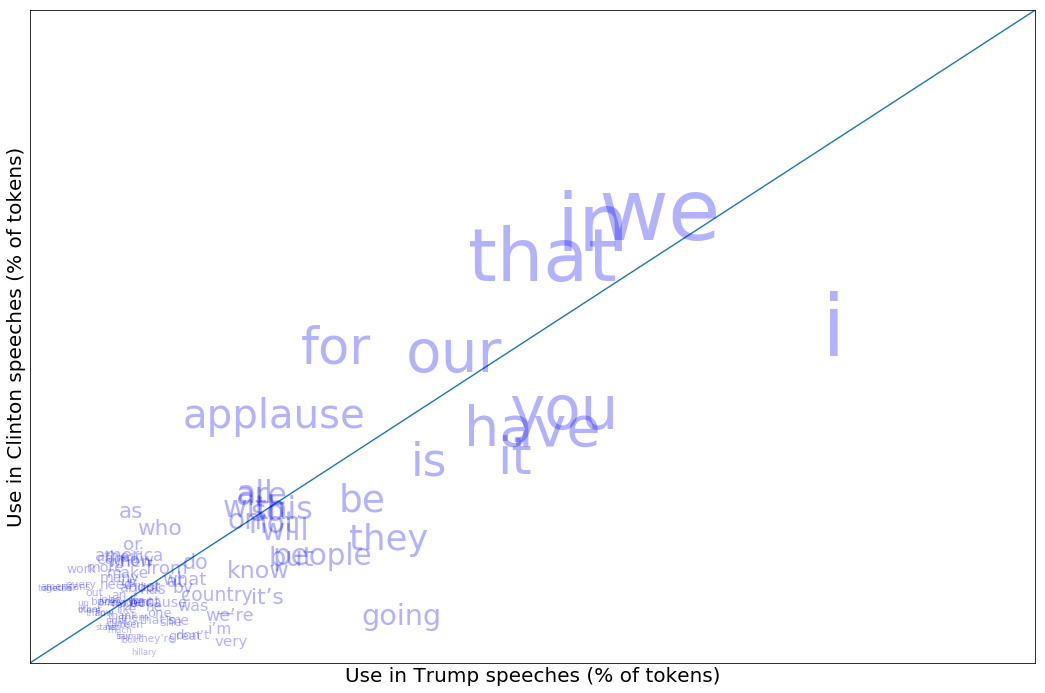

In [339]:
plot_shared_vocab(cdf)

* We can take a smaller slice of 50 words lower down the table using the start and end parameters of the `plot_shared_vocab()` function.

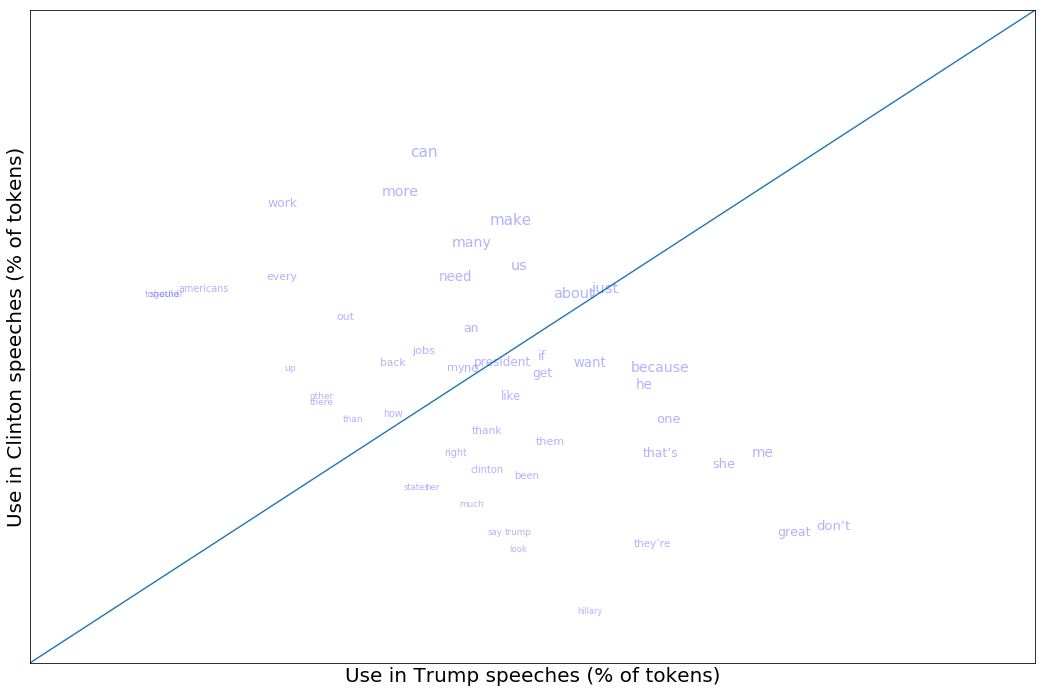

In [340]:
plot_shared_vocab(cdf,50,100)

### Phrase/N-Gram frequency lists

* We can build frequency lists from sequences of 2 or more tokens in a text using the same techniques and methods as for single word lists.
* __phrase__, __cluster__ and __n-gram__ are terms variously used to describe these kinds of items.
* The technique of collecting them is simple. Move across each token in a tokenized text (i.e. position i from i=0 to i=number of tokens minus phrase size (i.e. 2 for a two word phrase, 3 for a trigram, etc)) and add the combined item token_i and token_i+1 to the `Counter` object.

In [261]:
ex_text = 'To be, or not to be!'
ex_tokens = ex_text.lower().translate(punc_replacements).split()
ex_tokens

['to', 'be', 'or', 'not', 'to', 'be']

In [268]:
# bigrams
for i in range(len(ex_tokens) - 1):
    print(ex_tokens[i], ex_tokens[i+1])

to be
be or
or not
not to
to be


In [270]:
# trigrams
for i in range(len(ex_tokens) - 2):
    print(ex_tokens[i], ex_tokens[i+1], ex_tokens[i+2])

to be or
be or not
or not to
not to be


In [273]:
ex_bigrams = ["{}_{}".format(ex_tokens[i], ex_tokens[i+1]) for i in range(len(ex_tokens)-1)]
ex_bigrams

['to_be', 'be_or', 'or_not', 'not_to', 'to_be']

In [275]:
ex_bigram_freq = Counter()
ex_bigram_freq.update(ex_bigrams)
ex_bigram_freq

Counter({'be_or': 1, 'not_to': 1, 'or_not': 1, 'to_be': 2})

### Construct 2- and 3-gram lists from Trump and Clinton speeches

* We'll write a function `create_frequency_list()` which is a flexible way to create single word and n-gram/phrase lists from the corpus data structure we've used above (a dictionary of tokens)
* Example of the corpus data structure:

In [295]:
ex_corpus = {
    'text1': ['to','be','or','not','to','be'],
    'text2': ['that', 'is', 'the', 'question'],
    'text3': ['as', 'what', 'is', 'to', 'be']
}

In [296]:
def create_frequency_list(corpus, n=1, freq_list=None, debug=False):
    '''Generate a frequency list from a corpus of tokenized texts of 1-, 2-, 3-... gram size
    
    Args:
        corpus     -- dictionary of list of tokens
        n          -- size of items to use in list (i.e. single token n=1 [default], two words n=2, etc)
        freq_list  -- existing counter object to update default=None and new Counter() object is used
        debug      -- show debuging info [default = False]
        
    Returns:
        Counter object
    '''
    freq_list = Counter() if freq_list is None else freq_list

    for text_id, tokens in corpus.items():
        items = ['_'.join([tokens[j] for j in range(i,i+n)]) for i in range(len(tokens)-(n-1))]
        if debug:
            print(text_id, items)
        freq_list.update(items)
        
    return freq_list

#### Example of using `create_frequency_list()` function

* Single word frequency list from example corpus (`ex_corpus`)

In [298]:
create_frequency_list(ex_corpus, n=1, debug=True)

text1 ['to', 'be', 'or', 'not', 'to', 'be']
text2 ['that', 'is', 'the', 'question']
text3 ['as', 'what', 'is', 'to', 'be']


Counter({'as': 1,
         'be': 3,
         'is': 2,
         'not': 1,
         'or': 1,
         'question': 1,
         'that': 1,
         'the': 1,
         'to': 3,
         'what': 1})

* Two-word phrase frequency list from example corpus (`ex_corpus`)

In [299]:
create_frequency_list(ex_corpus, n=2, debug=True)

text1 ['to_be', 'be_or', 'or_not', 'not_to', 'to_be']
text2 ['that_is', 'is_the', 'the_question']
text3 ['as_what', 'what_is', 'is_to', 'to_be']


Counter({'as_what': 1,
         'be_or': 1,
         'is_the': 1,
         'is_to': 1,
         'not_to': 1,
         'or_not': 1,
         'that_is': 1,
         'the_question': 1,
         'to_be': 3,
         'what_is': 1})

* Now we can generate bigram and trigram lists from the Trump and Clinton speeches

In [304]:
clinton_bigrams = create_frequency_list(clinton_tokens, n=2)
clinton_trigrams = create_frequency_list(clinton_tokens, n=3)
trump_bigrams = create_frequency_list(trump_tokens, n=2)
trump_trigrams = create_frequency_list(trump_tokens, n=3)

In [305]:
clinton_bigrams.most_common(20)

[('in_the', 76),
 ('to_be', 50),
 ('of_the', 49),
 ('have_to', 48),
 ('we_have', 45),
 ('to_the', 44),
 ('applause_and', 43),
 ('and_we', 42),
 ('and_i', 41),
 ('and_the', 40),
 ('we_need', 39),
 ('need_to', 39),
 ('for_the', 38),
 ('to_make', 37),
 ('we_are', 35),
 ('thank_you', 34),
 ('going_to', 31),
 ('our_country', 31),
 ('on_the', 30),
 ('we_can', 30)]

In [306]:
trump_bigrams.most_common(20)

[('going_to', 208),
 ('of_the', 112),
 ('we_have', 101),
 ('to_be', 97),
 ('in_the', 72),
 ('have_to', 67),
 ('and_i', 64),
 ('our_country', 59),
 ('thank_you', 57),
 ('we’re_going', 57),
 ('and_we', 51),
 ('want_to', 49),
 ('you_know', 49),
 ('hillary_clinton', 45),
 ('the_united', 43),
 ('i_will', 43),
 ('look_at', 42),
 ('and_they', 40),
 ('we_will', 39),
 ('have_a', 39)]

In [307]:
cinton_trigrams.most_common(20)

[('we_have_to', 27),
 ('we_need_to', 24),
 ('the_united_states', 21),
 ('i_want_to', 16),
 ('we’re_going_to', 13),
 ('be_able_to', 12),
 ('those_at_the', 11),
 ('at_the_top', 11),
 ('a_lot_of', 10),
 ('around_the_world', 10),
 ('thank_you_all', 10),
 ('applause_and_i', 9),
 ('not_just_those', 9),
 ('just_those_at', 9),
 ('that’s_why_i', 9),
 ('we_are_stronger', 9),
 ('one_of_the', 8),
 ('and_we_are', 8),
 ('have_to_be', 8),
 ('president_i_will', 8)]

In [308]:
trump_trigrams.most_common(20)

[('we’re_going_to', 56),
 ('going_to_be', 54),
 ('the_united_states', 36),
 ('we_have_to', 34),
 ('i’m_going_to', 31),
 ('one_of_the', 25),
 ('not_going_to', 24),
 ('a_lot_of', 24),
 ('is_going_to', 23),
 ('you_look_at', 23),
 ('to_do_it', 19),
 ('applause_thank_you', 18),
 ('thank_you_very', 18),
 ('all_over_the', 18),
 ('you_very_much', 17),
 ('by_the_way', 17),
 ('in_the_world', 16),
 ('and_we_have', 15),
 ('the_middle_east', 15),
 ('are_going_to', 15)]

In [309]:
shared_trigrams = [(item, value, clinton_trigrams.get(item)) 
                for item,value in trump_trigrams.items() if clinton_trigrams.get(item)]
shared_trigrams.sort(key=lambda i: i[1]+i[2], reverse=True)
shared_trigrams_df=pd.DataFrame(shared_trigrams, columns=['word','Trump','Clinton'])
shared_trigrams_df['Trump_percent']=shared_trigrams_df.Trump / trump_num_tokens * 100
shared_trigrams_df['Clinton_percent']=shared_trigrams_df.Clinton / clinton_num_tokens * 100

In [312]:
shared_trigrams_df.head(10)

,word,Trump,Clinton,Trump_percent,Clinton_percent
0,we’re_going_to,56,13,0.220212,0.056655
1,we_have_to,34,27,0.133700,0.117668
2,the_united_states,36,21,0.141565,0.091519
3,going_to_be,54,2,0.212348,0.008716
4,i’m_going_to,31,3,0.121903,0.013074
5,a_lot_of,24,10,0.094377,0.043581
6,we_need_to,10,24,0.039324,0.104593
7,one_of_the,25,8,0.098309,0.034864
8,i_want_to,12,16,0.047188,0.069729
9,not_going_to,24,3,0.094377,0.013074


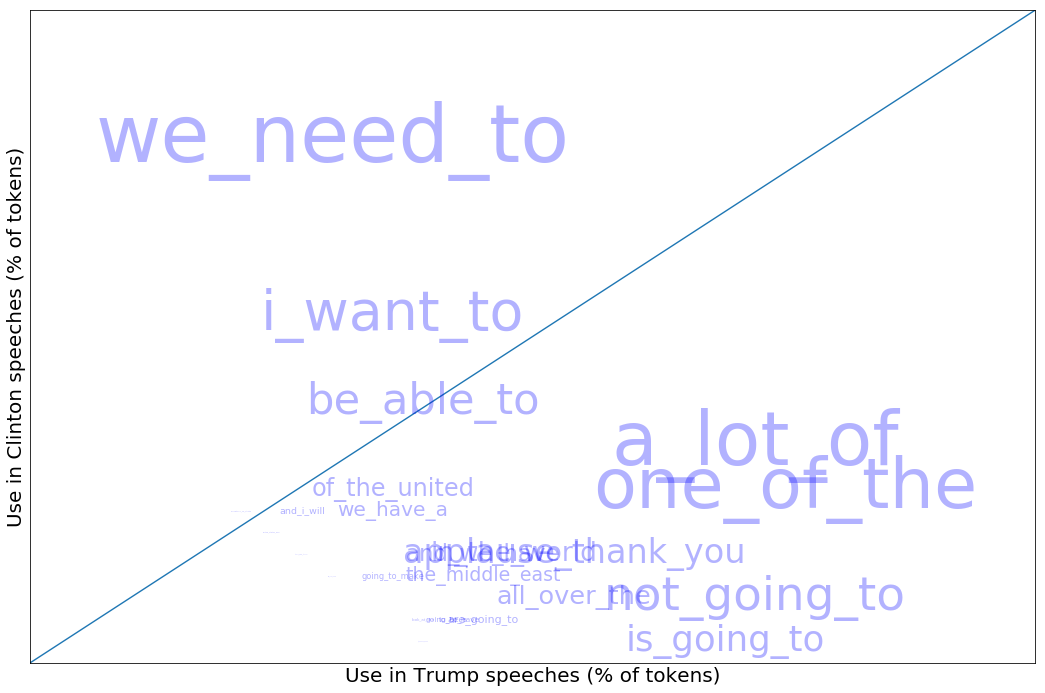

In [338]:
plot_shared_vocab(shared_trigrams_df[:30])

## Concordances

* Perhaps the most central tool in Corpus Linguistics is the concordance or KWIC display
* KWIC = Keyword in context
* Although simple conceptually and methodologically, a KWIC listing is an amazinly powerful way of discovering patterns of language usage
* There are various ways to construct and manipulate a KWIC. Here we will first create a function that uses tokenized text (i.e. a list of tokens) and then second a character based version that works with untokenized text(s).

In [178]:
def make_kwic(kw, text, win=4):
    '''A basic KWIC function for a text
    
    Args:
        kw   -- string match for keyword to match for each line
        text -- a list of tokens for the text
        
    Return:
        list of lines of form [ [left context words], kw, [right context words]]
    '''
    
    hits = [(w,i) for i,w in enumerate(text) if w==kw]
    
    lines = []
    for hit in hits:
        left = text[hit[1]-win:hit[1]]
        kw = text[hit[1]]
        right = text[hit[1]+1 : hit[1]+win+1]
        
        lines.append([left, kw, right])
        
    return lines

* The `make_kwic()` function takes a list of tokens and returns a list of KWIC rows where each row has three items:
    1. left context (list of tokens of length win)
    2. the keyword
    3. right context (list of tokens of length win)
    
* For example, here is a KWIC object created on the keyword **_thank_** in Clinton's campaign victory speech

In [349]:
make_kwic('thank', clinton_tokens['clinton_victory'])

[[['you', 'i', 'want', 'to'],
  'thank',
  ['all', 'the', 'volunteers', 'community']],
 [['delegates', 'i', 'want', 'to'],
  'thank',
  ['all', 'the', 'people', 'across']],
 [['that', 'case', 'to', 'america'], 'thank', ['you', 'god', 'bless', 'you']]]

* Or the word **_believe_** in Trump's campaign launch

In [352]:
make_kwic('believe', trump_tokens['trump_launch'])

[[['are', 'not', 'our', 'friend'],
  'believe',
  ['me', 'but', 'they’re', 'killing']],
 [['in', 'syria', 'can', 'you'], 'believe', ['this', 'they', 'built', 'a']],
 [['to', '20', 'percent', 'don’t'],
  'believe',
  ['the', '56', 'don’t', 'believe']],
 [['believe', 'the', '56', 'don’t'],
  'believe',
  ['it', 'that’s', 'right', 'a']],
 [['will', 'not', 'bring', 'us—'],
  'believe',
  ['me—', 'to', 'the', 'promised']],
 [['level', 'that', 'you', 'wouldn’t'],
  'believe',
  ['it', 'makes', 'it', 'impossible']],
 [['opinion', 'the', 'new', 'china'], 'believe', ['it', 'or', 'not', 'in']],
 [['one', 'for', 'each', 'country'], 'believe', ['me', 'folks', 'we', 'will']],
 [['except', 'for', 'us', 'and'], 'believe', ['me', 'you', 'look', 'at']],
 [['i', 'don’t', 'have', 'to'], 'believe', ['it', 'or', 'not', 'i’m']],
 [['walls', 'better', 'than', 'me'],
  'believe',
  ['me', 'and', 'i’ll', 'build']],
 [['do', 'that', 'like', 'me'], 'believe', ['me', 'it', 'will', 'be']],
 [['trillion', 'in', 'de

* These are useful data structure for futher processing but hard to read, so we can create a `print_kwic()` function:

In [58]:
def print_kwic(kwic, win=None):
    '''A basic print function for a KWIC object
    
    Args:
        kwic -- a list of KWIC lines of the form [ [left words], kw, [right words]]
        win  -- if None then use all words provided in context otherwise limit by win
        
    Prints KWIC lines with left context width/padding win*8 characters
    '''
    
    if not kwic:
        return
    
    if win is None:
        win = len(kwic[0][0])
    
    for line in kwic:
        print("{:>{}}  {}  {}".format(' '.join(line[0][-win:]), 
                                      win*7, 
                                      line[1], 
                                      ' '.join(line[2][:win])
                                     )
             )            

In [350]:
print_kwic(make_kwic('thank', clinton_tokens['clinton_victory']))

               you i want to  thank  all the volunteers community
         delegates i want to  thank  all the people across
        that case to america  thank  you god bless you


In [351]:
print_kwic(make_kwic('believe', trump_tokens['trump_launch']))

          are not our friend  believe  me but they’re killing
            in syria can you  believe  this they built a
         to 20 percent don’t  believe  the 56 don’t believe
        believe the 56 don’t  believe  it that’s right a
          will not bring us—  believe  me— to the promised
     level that you wouldn’t  believe  it makes it impossible
       opinion the new china  believe  it or not in
        one for each country  believe  me folks we will
           except for us and  believe  me you look at
             i don’t have to  believe  it or not i’m
        walls better than me  believe  me and i’ll build
             do that like me  believe  me it will be
    trillion in debt because  believe  me we’re in a


### Sorting a KWIC listing

* The best way to discover usage patterns in a KWIC listing is to order the lines alphabetically according to words in the left or/and right context
* We could add this functionality into the `make_kwic()` function or better create a `sort_kwic()` function. But for now we will just use the standard `.sort()` function on a `list` object give then our KWIC object is a list-of-lists.

In [353]:
trump_believe = make_kwic('believe', trump_tokens['trump_launch'])
# sort concordance lines on right context
trump_believe.sort(key=lambda x: x[2])
print_kwic(trump_believe)

     level that you wouldn’t  believe  it makes it impossible
       opinion the new china  believe  it or not in
             i don’t have to  believe  it or not i’m
        believe the 56 don’t  believe  it that’s right a
        walls better than me  believe  me and i’ll build
          are not our friend  believe  me but they’re killing
        one for each country  believe  me folks we will
             do that like me  believe  me it will be
    trillion in debt because  believe  me we’re in a
           except for us and  believe  me you look at
          will not bring us—  believe  me— to the promised
         to 20 percent don’t  believe  the 56 don’t believe
            in syria can you  believe  this they built a


In [360]:
clinton_believe = make_kwic('believe', clinton_tokens['clinton_launch'])
# sort on left context
clinton_believe.sort(key=lambda x: x[0][-1])
print_kwic(clinton_believe)

       on roosevelt island i  believe  we have a continuing
        vision for america i  believe  that success isn’t measured
             me that’s why i  believe  with all my heart
     the toughest problems i  believe  we can do all
          in today’s world i  believe  it is or i
               and at home i  believe  you should have the
            paid sick days i  believe  you should receive your
              to get ahead i  believe  you should look forward
         breaking the bank i  believe  we should offer paid
             out there too i  believe  the future holds far
          to hide away… they  believe  in yesterday and you’re
            led my father to  believe  that if he scrimped
           men and women who  believe  that all of us


* We can also call the `make_kwic()` function on each text in a corpus

In [361]:
clinton_believe_all=[]
for text_id, tokens in clinton_tokens.items():
    clinton_believe_all.extend(make_kwic('believe', tokens))

In [362]:
# sort on R1 position
clinton_believe_all.sort(key=lambda x: x[2])
print_kwic(clinton_believe_all)

           now that’s what i  believe  and you won’t be
               that is why i  believe  deeply that if we
          and we sure should  believe  him it’s not just
          to hide away… they  believe  in yesterday and you’re
          or a candidate you  believe  in – and to
          in today’s world i  believe  it is or i
             and so i really  believe  it’s not just the
             than this and i  believe  it’s our responsibility as
     here because i honestly  believe  jim hunt was not
           might lead you to  believe  our work together to
           men and women who  believe  that all of us
             and fair we all  believe  that america succeeds when
     to their communities we  believe  that cooperation is better
            led my father to  believe  that if he scrimped
        vision for america i  believe  that success isn’t measured
        but powerful idea we  believe  that we are stronger
       strongest when we all  believe  that we have a
 

In [365]:
trump_believe_all=[]
for text_id, tokens in trump_tokens.items():
    trump_believe_all.extend(make_kwic('believe', tokens))
    
# sort on R1 position
trump_believe_all.sort(key=lambda x: x[2])
print_kwic(trump_believe_all)

          little bit hard to  believe  but believe me i
           it’s just hard to  believe  but just so many
           hour and i really  believe  i could get everybody
         you go you wouldn’t  believe  it because it’s so
     level that you wouldn’t  believe  it makes it impossible
       opinion the new china  believe  it or not in
             i don’t have to  believe  it or not i’m
     a reduction in violence  believe  it or not syria
        believe the 56 don’t  believe  it that’s right a
      laughter believe me oh  believe  me and it’s a
        walls better than me  believe  me and i’ll build
        to israel believe me  believe  me and you know
          all talk no action  believe  me applause i came
          and it’ll end soon  believe  me applause in palestinian
contract enforced before folks  believe  me applause iran has
       that reach believe me  believe  me applause third at
        to just the opposite  believe  me applause trump thank
       ever happ

#### Notice..

* Clinton does not use the phraseb **_believe me_** at all whereas Trump uses it 23 times

In [369]:
len([line for line in clinton_believe_all if line[2][0]=='me'])

0

In [368]:
len([line for line in trump_believe_all if line[2][0]=='me'])

23

* Conversely Trump says **_i believe_** only once, whereas Clinton says it 18 times

In [370]:
len([line for line in clinton_believe_all if line[0][-1]=='i'])

18

In [371]:
len([line for line in trump_believe_all if line[0][-1]=='i'])

1

* There are some wrinkles in the make_kwic() and print_kwic() functions as you can see but hopefully they illustrate how easy it is to manipulate and display text data in Python and use it to discover interesting patterns that might warrant interpretation and further exploration.

### There is always more than one way to do something...

* Here is a more complex looking single line implementation of a KWIC that works on untokenized text and uses regular expressions to match strings.
* We will come back to regular expressions soon but they'll need a notebook and explanation of their own!

In [374]:
import re

In [378]:
kwic2 = lambda kw, txt, window=40: re.findall(r'(.{,%i}\b%s\b.{,%i})' % (window,kw,window), 
                                                       re.sub('\n|\s{2,}',' ',txt), flags=re.I)

In [381]:
trump_launch_text = open(os.path.join(trump_speeches_dir,'launch.txt')).read()
clinton_launch_text = open(os.path.join(clinton_speeches_dir,'launch.txt')).read()

In [382]:
kwic2('believe',trump_launch_text)

[' economically. They are not our friend, believe me. But they’re killing us economically',
 'ey just built a hotel in Syria. Can you believe this? They built a hotel. When I have t',
 's anywhere from 18 to 20 percent. Don’t believe the 5.6. Don’t believe it.  That’s righ',
 'gonna get done. They will not bring us— believe me— to the promised land. They will not',
 'r currency to a level that you wouldn’t believe. It makes it impossible for our compani',
 'na.  And, in my opinion, the new China, believe it or not, in terms of trade, is Mexico',
 'd, and I put them one for each country. Believe me, folks. We will do very, very well, ',
 'y wouldn’t be there except for us.  And believe me, you look at the border with Yemen. ',
 ' I don’t have to brag. I don’t have to, believe it or not.  I’m doing that to say that ',
 'and nobody builds walls better than me, believe me, and I’ll build them very inexpensiv',
 'structure.  Nobody can do that like me. Believe me. It will be done on time, o

In [383]:
kwic2('going to',clinton_launch_text)

['g my own. It’s what kept my grandfather going to work in the same Scranton lace mill eve',
 'ing to think about their future again – going to college, starting a business, buying a ',
 'ganized scholarships for single parents going to college, led efforts for better schools',
 'g worth voting for. Government is never going to have all the answers – but it has to be',
 'h she could have seen the America we’re going to build together. An America, where if yo']

In [384]:
kwic2('country',clinton_launch_text)

['United Nations, where I represented our country many times. To be here in this beautifu',
 'your basic bargain too. You brought our country back. Now it’s time — your time to secu',
 'ous with destiny. Each American and the country we cherish. I’m running to make our eco',
 'eed us. For the veterans who served our country. For the small business owners who took',
 'e Americans, but for all Americans. Our country’s challenges didn’t begin with the Grea',
 'other willing partner across our entire country. And I will do just that — to turn the ',
 'd sustainable economic future from coal country to Indian country, from small towns in ',
 'they should and as we need them to. Our country won’t be competitive or fair if we don’',
 'ace, security, and prosperity. No other country on Earth is better positioned to thrive',
 ' in the 21st century. No other country is better equipped to meet traditional ',
 'rise of new powers like China. No other country is better prepared to meet emerging thr

In [385]:
kwic2('country',trump_launch_text)

['I don’t think it’s gonna happen.    Our country is in serious trouble. We don’t have vi',
 'er and stronger by the way, and we as a country are getting weaker. Even our nuclear ar',
 'ng things for some people, but for this country, it’s destroying our country. We have t',
 'stop, and it has to stop now.  Now, our country needs— our country needs a truly great ',
 'nk he’ll be a great cheerleader for the country. I think he’d be a great spirit.”  He w',
 ' somebody that literally will take this country and make it great again. We can do that',
 'd of mindset that you need to make this country great again.  So ladies and gentlemen…I',
 'ed States, and we are going to make our country great again.  It can happen. Our countr',
 'll, and we’re going to be thriving as a country, thriving. It can happen.  I will be th',
 ' China sea. A military island. Now, our country could never do that because we’d have t',
 'd the environmentalist wouldn’t let our country— we would never build in an oc

## Collocation

* Another central concept and method in Corpus Linguistics is **collocation analysis**. 
* Collocation analysis is basically the creation of a frequency list of the words within a specified number of words (window) of a keyword. 
* For example, let's create a list of thr frequency of all the words that are found four words to the left and four words to the right of the keyword _country_ in the 6 Trump speeches.

In [411]:
trump_country_colls = Counter()
for speech, tokens in trump_tokens.items():
    context=[tokens[i-4:i] + tokens[i+1:i+5] for i,w in enumerate(tokens) if w=='country']
    for item in context:
        trump_country_colls.update(item)
        
trump_country_colls.most_common(30)

[('our', 79),
 ('the', 34),
 ('to', 31),
 ('and', 31),
 ('we', 29),
 ('into', 21),
 ('of', 19),
 ('a', 19),
 ('this', 18),
 ('in', 16),
 ('have', 15),
 ('for', 15),
 ('all', 10),
 ('going', 10),
 ('great', 10),
 ('country', 10),
 ('make', 9),
 ('it', 9),
 ('that', 9),
 ('so', 8),
 ('be', 8),
 ('but', 8),
 ('will', 8),
 ('i', 8),
 ('over', 8),
 ('is', 8),
 ('back', 7),
 ('not', 7),
 ('people', 7),
 ('has', 6)]

In [388]:
# number of times COUNTRY occurs
trump_word_dist['country']

117

* This list shows that the word _our_ is found 79 times within the window of the 117 occurrences of _country_. While _great_ is found 10 times in these 117 occurrences, and so on.
* We can create a function `get_collocates()` to make this more flexible:

In [393]:
def get_collocates(kw,token_dict, span=4):
    ''' Create a frequency list of the collocates of a specified keyword in a corpus of texts
    
    Args:
        kw         -- keyword to use as center of analysis
        token_dict -- corpus in the form of a dictionary of tokenized texts where a text is a list of tokens
        span       --
        
    Returns:
    
        Frequency list of collocates in a Counter object 
    '''
    collocates = Counter()
    for speech, tokens in token_dict.items():
        hits = [i for i,w in enumerate(tokens) if w==kw]
        for i in hits:
            collocates.update(tokens[i-span:i] + tokens[i+1:span+1] )
        
    return collocates

In [394]:
clinton_country_colls = get_collocates('country',clinton_tokens, span=2)
trump_country_colls = get_collocates('country',trump_tokens, span=2)

* Just as with frequency lists we generated above we can compare the most common collocates of __country__ in the Clinton and Trump texts.

In [396]:
list(zip(clinton_country_colls.most_common(15),trump_country_colls.most_common(15)))

[(('our', 32), ('our', 61)),
 (('across', 9), ('the', 21)),
 (('in', 8), ('into', 19)),
 (('the', 8), ('this', 17)),
 (('this', 5), ('for', 12)),
 (('of', 5), ('make', 7)),
 (('a', 5), ('in', 7)),
 (('other', 4), ('a', 7)),
 (('to', 4), ('to', 5)),
 (('and', 3), ('over', 5)),
 (('no', 3), ('of', 4)),
 (('only', 1), ('their', 4)),
 (('developed', 1), ('third', 4)),
 (('foreign', 1), ('have', 4)),
 (('advanced', 1), ('world', 3))]

* We can also create a visual representation of the collocates of a keyword as a graph where the thickness of the edge represents the frequency

In [405]:
import graphviz
import math

* Clinton collocates of _country_ as all speeches in a 4 word window

In [407]:
cG = graphviz.Graph(engine='neato')
cG.attr('graph', overlap='scalexy')
for c in clinton_country_colls.most_common(30):
    cG.edge('COUNTRY',c[0], penwidth=str(math.log(c[1],2)+1))

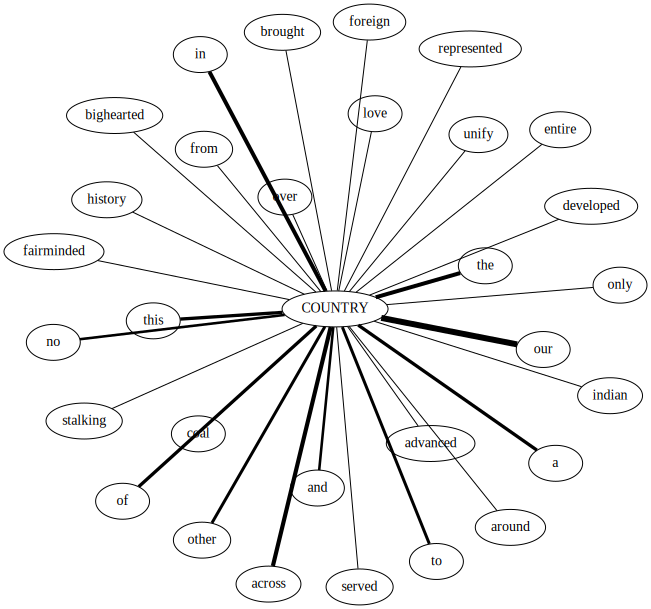

In [408]:
cG

* Trump collocates of _country_ as all speeches in a 4 word window

In [409]:
tG = graphviz.Graph(engine='neato')
tG.attr('graph', overlap='scalexy')

for c in trump_country_colls.most_common(30):
    tG.edge('COUNTRY',c[0], penwidth=str(math.log(c[1],2)+1))

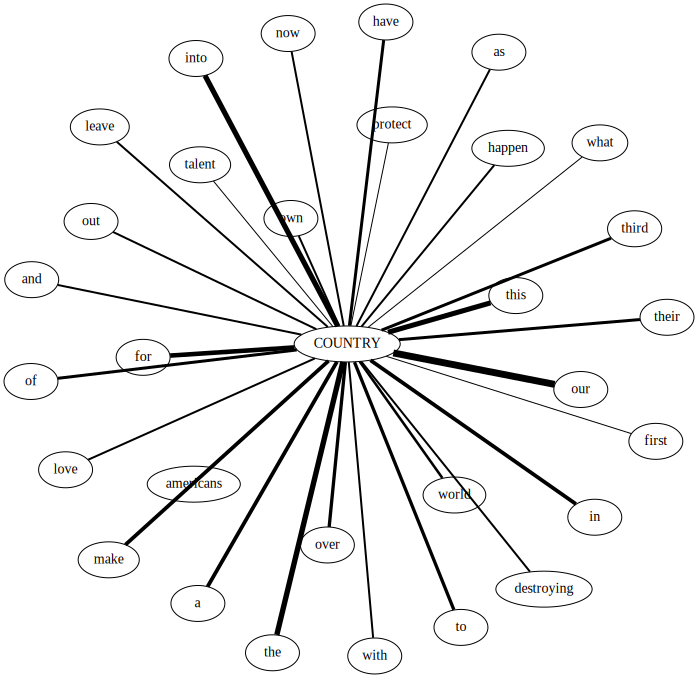

In [410]:
tG

In [431]:
def plot_collocates(kw, collocate_list, num=20, show_freq=False, title=None, threshold=1):
    ''' Create a graph of the collocates of a keyword within a specified window and threshold
    
    Args:
        kw              -- keyword to place at center of graph
        collocate_list  -- Counter object of collocate frequencies
        num             -- the number of collocates (in descending frequency to display) [default=20]
        show_freq       -- whether to show frequency beside edge True/False [default=False]
        title           -- string to use as a title for the plot [default=None]
        threshold       -- frequency threshold for showing edges [default=1]
        
    '''
    cG = graphviz.Graph(engine='neato')
    cG.attr('graph', overlap='scalexy', size="8,8")
    if title:
        cG.attr('graph', label=title, labelloc='t', fontsize='20')
    for item, freq in collocate_list.most_common(num):
        if freq >= threshold:
            cG.edge(kw.upper(), item, penwidth=str(math.log(freq,2)+1), 
                    label=None if not show_freq else str(freq))
    
    return cG

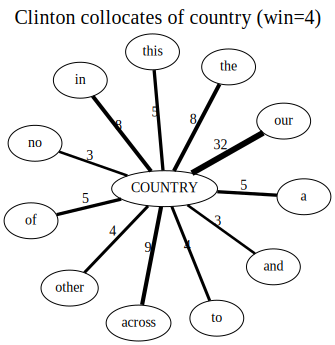

In [424]:
plot_collocates('country', clinton_country_colls, num=25, 
                show_freq=True, threshold=2,
                title='Clinton collocates of country (win=4)')

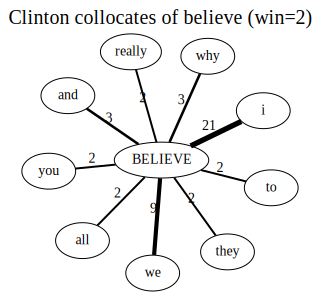

In [425]:
plot_collocates('believe', 
                get_collocates('believe', clinton_tokens, span=2), 
                num=25, title='Clinton collocates of believe (win=2)', show_freq=True, threshold=2)

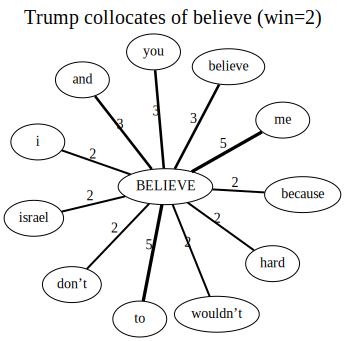

In [428]:
plot_collocates('believe', 
                get_collocates('believe', trump_tokens, span=2), 
                num=25, title='Trump collocates of believe (win=2)',
               threshold=2, show_freq=True)

## Keyness 

* The analysis of __keyness__ is based upon the comparison of item frequencies in one text/corpus with their frequency in a comparable or larger reference corpus. It reveals items that are significantly over and under represented in the target text/corpus and thereby should be investigated further.

* See http://ucrel.lancs.ac.uk/llwizard.html for details on the statistical analysis commonly used to calculate keyness.


In [441]:
log_likelihood(10,100,51,500)

-0.0032931461626396485

In [439]:
def log_likelihood(item_A_freq, corpus_A_size, item_B_freq, corpus_B_size):
    
    E1 = corpus_A_size*(item_A_freq+item_B_freq) / (corpus_A_size+corpus_B_size) 
    E2 = corpus_B_size*(item_A_freq+item_B_freq) / (corpus_A_size+corpus_B_size)
    
    G2 = 2*((item_A_freq*math.log(item_A_freq/E1)) + (item_B_freq*math.log(item_B_freq/E2)))
    
    sign = 1 if (item_A_freq / corpus_A_size) >= (item_B_freq / corpus_B_size) else -1
    
    return sign*G2

* Add a new column to the shared vocab table with the log-likelihood value for each row

In [449]:
cdf['keyness']=cdf.apply(lambda row: log_likelihood(row.Trump, trump_num_tokens, row.Clinton, clinton_num_tokens), 
                         axis=1)

* Top 20 words most distinctive of Trump speeches compared to the Clinton ones.

In [466]:
cdf.iloc[cdf.keyness.sort_values(ascending=False).index].head(20)

,word,Trump,Clinton,Trump_percent,Clinton_percent,text_size,keyness
26,going,233,40,0.916241,0.174322,0.142741,131.864088
48,very,126,18,0.495478,0.078445,0.074601,80.395870
47,i’m,119,29,0.467951,0.126384,0.077293,49.871278
98,hillary,71,9,0.279198,0.039223,0.040903,48.468349
60,don’t,102,24,0.401101,0.104593,0.065603,44.286432
65,great,97,23,0.381439,0.100235,0.062435,41.794618
5,i,504,288,1.981911,1.255121,0.425838,39.551179
39,we’re,125,41,0.491545,0.178680,0.087303,36.340495
172,china,38,2,0.149430,0.008716,0.019764,35.975864
30,it’s,149,57,0.585922,0.248409,0.108946,33.663049


In [467]:
cdf.iloc[cdf.keyness.sort_values().index].head(20)

,word,Trump,Clinton,Trump_percent,Clinton_percent,text_size,keyness
150,families,2,46,0.007865,0.200471,0.026384,-54.563735
106,women,10,67,0.039324,0.291990,0.042603,-53.341229
154,let’s,3,44,0.011797,0.191755,0.025753,-47.180629
147,economy,4,45,0.015729,0.196113,0.026846,-44.563601
121,–,10,59,0.039324,0.257125,0.038005,-43.767410
96,should,17,65,0.066850,0.283274,0.045084,-35.123992
93,together,17,65,0.066850,0.283274,0.045084,-35.123992
32,as,63,132,0.247739,0.575264,0.107452,-32.559301
205,future,3,30,0.011797,0.130742,0.017706,-28.504075
236,health,2,27,0.007865,0.117668,0.015463,-28.293369


-----------


# Natural Language Processing (NLP)

* Here are a few examples of common NLP tasks. They are here just for illustration and we won't discuss or explain them in detail in this introductory notebook. 
* The tasks are:
    * **TOKENIZATION**
    * **PARSING**
    * **NAMED-ENTITY RECOGNITION**
    * **SENTIMENT ANALYSIS**
  
  
* The examples below use functionality from two Python NLP packages:
    1. NLTK (Natural Language Toolkit)
    2. spaCY

In [469]:
from nltk import pos_tag
from nltk import tokenize

### Tokenization

In [68]:
trump_launch_text = open(os.path.join(trump_speeches_dir,'launch.txt')).read()

#### 1. Sentence tokenization

In [69]:
trump_launch_sents = tokenize.sent_tokenize(trump_launch_text)

In [70]:
trump_launch_sents[:20]

['Wow.',
 'Whoa.',
 'That is some group of people.',
 'Thousands.',
 'So nice, thank you very much.',
 'That’s really nice.',
 'Thank you.',
 'It’s great to be at Trump Tower.',
 'It’s great to be in a wonderful city, New York.',
 'And it’s an honor to have everybody here.',
 'This is beyond anybody’s expectations.',
 'There’s been no crowd like this.',
 'And, I can tell, some of the candidates, they went in.',
 'They didn’t know the air-conditioner didn’t work.',
 'They sweated like dogs.',
 'They didn’t know the room was too big, because they didn’t have anybody there.',
 'How are they going to beat ISIS?',
 'I don’t think it’s gonna happen.',
 'Our country is in serious trouble.',
 'We don’t have victories anymore.']

#### 2. Word tokenization

In [71]:
trump_launch_toks_nltk=tokenize.word_tokenize(trump_launch_text)
trump_launch_toks_nltk[:50]

['Wow',
 '.',
 'Whoa',
 '.',
 'That',
 'is',
 'some',
 'group',
 'of',
 'people',
 '.',
 'Thousands',
 '.',
 'So',
 'nice',
 ',',
 'thank',
 'you',
 'very',
 'much',
 '.',
 'That',
 '’',
 's',
 'really',
 'nice',
 '.',
 'Thank',
 'you',
 '.',
 'It',
 '’',
 's',
 'great',
 'to',
 'be',
 'at',
 'Trump',
 'Tower',
 '.',
 'It',
 '’',
 's',
 'great',
 'to',
 'be',
 'in',
 'a',
 'wonderful',
 'city']

### POS tagging

In [470]:
[pos_tag(tokenize.word_tokenize(sent)) for sent in tokenize.sent_tokenize(trump_launch_text)]

[[('Wow', 'NNP'), ('.', '.')],
 [('Whoa', 'NNP'), ('.', '.')],
 [('That', 'DT'),
  ('is', 'VBZ'),
  ('some', 'DT'),
  ('group', 'NN'),
  ('of', 'IN'),
  ('people', 'NNS'),
  ('.', '.')],
 [('Thousands', 'NNS'), ('.', '.')],
 [('So', 'RB'),
  ('nice', 'JJ'),
  (',', ','),
  ('thank', 'VB'),
  ('you', 'PRP'),
  ('very', 'RB'),
  ('much', 'RB'),
  ('.', '.')],
 [('That', 'DT'),
  ('’', 'VBZ'),
  ('s', 'VBP'),
  ('really', 'RB'),
  ('nice', 'JJ'),
  ('.', '.')],
 [('Thank', 'NNP'), ('you', 'PRP'), ('.', '.')],
 [('It', 'PRP'),
  ('’', 'VBZ'),
  ('s', 'JJ'),
  ('great', 'JJ'),
  ('to', 'TO'),
  ('be', 'VB'),
  ('at', 'IN'),
  ('Trump', 'NNP'),
  ('Tower', 'NNP'),
  ('.', '.')],
 [('It', 'PRP'),
  ('’', 'VBZ'),
  ('s', 'JJ'),
  ('great', 'JJ'),
  ('to', 'TO'),
  ('be', 'VB'),
  ('in', 'IN'),
  ('a', 'DT'),
  ('wonderful', 'JJ'),
  ('city', 'NN'),
  (',', ','),
  ('New', 'NNP'),
  ('York', 'NNP'),
  ('.', '.')],
 [('And', 'CC'),
  ('it', 'PRP'),
  ('’', 'NNP'),
  ('s', 'VBD'),
  ('an', 'DT'),

In [471]:
pos_tag(trump_tokens['trump_launch'])

[('wow', 'NN'),
 ('whoa', 'NN'),
 ('that', 'WDT'),
 ('is', 'VBZ'),
 ('some', 'DT'),
 ('group', 'NN'),
 ('of', 'IN'),
 ('people', 'NNS'),
 ('thousands', 'NNS'),
 ('so', 'RB'),
 ('nice', 'JJ'),
 ('thank', 'NN'),
 ('you', 'PRP'),
 ('very', 'RB'),
 ('much', 'JJ'),
 ('that’s', 'NN'),
 ('really', 'RB'),
 ('nice', 'JJ'),
 ('thank', 'NN'),
 ('you', 'PRP'),
 ('it’s', 'VBP'),
 ('great', 'JJ'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('at', 'IN'),
 ('trump', 'NN'),
 ('tower', 'NN'),
 ('it’s', 'NN'),
 ('great', 'JJ'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('wonderful', 'JJ'),
 ('city', 'NN'),
 ('new', 'JJ'),
 ('york', 'NN'),
 ('and', 'CC'),
 ('it’s', 'VB'),
 ('an', 'DT'),
 ('honor', 'NN'),
 ('to', 'TO'),
 ('have', 'VB'),
 ('everybody', 'NN'),
 ('here', 'RB'),
 ('this', 'DT'),
 ('is', 'VBZ'),
 ('beyond', 'IN'),
 ('anybody’s', 'JJ'),
 ('expectations', 'NNS'),
 ('there’s', 'VBP'),
 ('been', 'VBN'),
 ('no', 'DT'),
 ('crowd', 'NN'),
 ('like', 'IN'),
 ('this', 'DT'),
 ('and', 'CC'),
 ('i', 

### Parsing and Named Entity Recognition (NER)

In [472]:
import spacy
from spacy import displacy

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter("ignore")

In [473]:
nlp = spacy.load('en_core_web_sm')

In [474]:
trump_launch_doc = nlp(trump_launch_sents[4])

In [475]:
for tidx,token in enumerate(trump_launch_doc[:50]):
    print(tidx,token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
          token.shape_, token.is_alpha, token.is_stop)

0 So so ADV RB advmod Xx True False
1 nice nice ADJ JJ advmod xxxx True False
2 , , PUNCT , punct , False False
3 thank thank VERB VBP ROOT xxxx True False
4 you -PRON- PRON PRP dobj xxx True True
5 very very ADV RB advmod xxxx True True
6 much much ADV RB advmod xxxx True True
7 . . PUNCT . punct . False False


In [476]:
displacy.render(trump_launch_doc, style='dep', jupyter=True)

/opt/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)
/opt/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)


In [82]:
for sent in trump_launch_sents[4:10]:
    doc = nlp(sent)
    displacy.render(doc, style='dep', jupyter=True)
    plt.show()

/opt/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)
/opt/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)


/opt/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)


/opt/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)


/opt/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)


/opt/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)
/opt/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)


/opt/anaconda3/lib/python3.6/runpy.py:193: DeprecationWarning: Positional arguments to Doc.merge are deprecated. Instead, use the keyword arguments, for example tag=, lemma= or ent_type=.
  "__main__", mod_spec)


In [479]:
trump_launch_text_doc = nlp(trump_launch_text)

In [480]:
displacy.render(trump_launch_text_doc , style='ent', jupyter=True)

### Sentiment analysis

In [481]:
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [482]:
vs = SentimentIntensityAnalyzer()
trump_launch_sentiment=[]
for sent in tokenize.sent_tokenize(trump_launch_text):
    pol = vs.polarity_scores(sent)
    trump_launch_sentiment.append((sent, pol))

In [483]:
trump_launch_sentiment[:10]

[('Wow.', {'compound': 0.5859, 'neg': 0.0, 'neu': 0.0, 'pos': 1.0}),
 ('Whoa.', {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}),
 ('That is some group of people.',
  {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}),
 ('Thousands.', {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}),
 ('So nice, thank you very much.',
  {'compound': 0.707, 'neg': 0.0, 'neu': 0.405, 'pos': 0.595}),
 ('That’s really nice.',
  {'compound': 0.4754, 'neg': 0.0, 'neu': 0.393, 'pos': 0.607}),
 ('Thank you.', {'compound': 0.3612, 'neg': 0.0, 'neu': 0.286, 'pos': 0.714}),
 ('It’s great to be at Trump Tower.',
  {'compound': 0.6249, 'neg': 0.0, 'neu': 0.594, 'pos': 0.406}),
 ('It’s great to be in a wonderful city, New York.',
  {'compound': 0.8316, 'neg': 0.0, 'neu': 0.473, 'pos': 0.527}),
 ('And it’s an honor to have everybody here.',
  {'compound': 0.4939, 'neg': 0.0, 'neu': 0.686, 'pos': 0.314})]

In [484]:
trump_sentiment=[sent[1]['compound'] for idx, sent in enumerate(trump_launch_sentiment,1)]

Text(0.5,1,'Sentiment of Trump campaign launch')

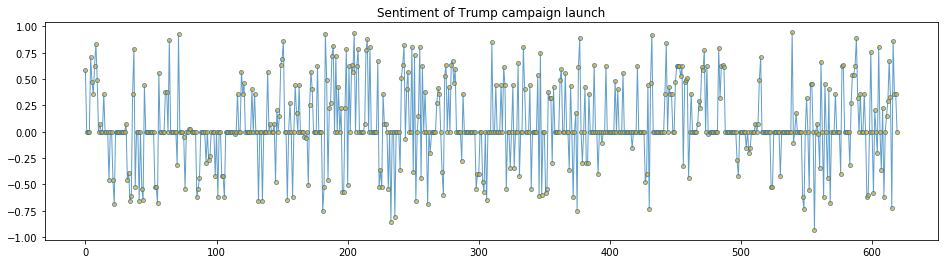

In [485]:
fig = plt.figure(figsize=(16,4))
plt.plot(trump_sentiment, '-o', ms=4, lw=1, alpha=0.7, mfc='orange')
plt.title('Sentiment of Trump campaign launch')  

In [486]:
[(sent, score['compound']) for sent,score in trump_launch_sentiment if score['compound']<-.5]

[('They kill us.', -0.6908),
 ('But they’re killing us economically.', -0.6597),
 ('The U.S. has become a dumping ground for everybody else’s problems.',
  -0.6124),
 ('When Mexico sends its people, they’re not sending their best.', -0.5216),
 ('They’re sending people that have lots of problems, and they’re bringing those problems with us.',
  -0.6597),
 ('They’re bringing crime.', -0.5423),
 ('They’re rapists.', -0.6486),
 ('Because we have no protection and we have no competence, we don’t know what’s happening.',
  -0.5267),
 ('And it’s got to stop and it’s got to stop fast.', -0.5267),
 ('Islamic terrorism is eating up large portions of the Middle East.',
  -0.6808),
 ('Last week, I read 2,300 Humvees— these are big vehicles— were left behind for the enemy.',
  -0.5423),
 ('Our labor participation rate was the worst since 1978.', -0.6249),
 ('But think of it, GDP below zero, horrible labor participation rate.',
  -0.5423),
 ('They don’t know what they’re doing.”\n\nWe have a disaste

In [487]:
clinton_launch_text = open(os.path.join(clinton_speeches_dir,'launch.txt')).read()

In [488]:
clinton_launch_sentiment = []
for sent in tokenize.sent_tokenize(clinton_launch_text):
    pol = vs.polarity_scores(sent)
    clinton_launch_sentiment.append((sent, pol))

Text(0.5,1,'Sentiment of Clinton campaign launch')

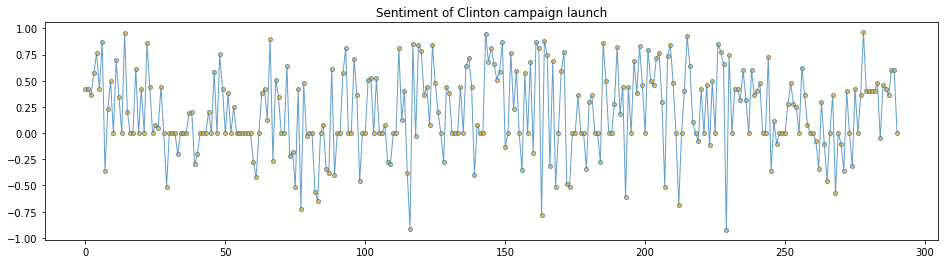

In [489]:
clinton_sentiment=[sent[1]['compound'] for idx, sent in enumerate(clinton_launch_sentiment,1)]
fig = plt.figure(figsize=(16,4))
plt.plot(clinton_sentiment, '-o', ms=4, lw=1, alpha=0.7, mfc='orange')
plt.title('Sentiment of Clinton campaign launch')  

In [490]:
[(sent, score['compound']) for sent,score in clinton_launch_sentiment if score['compound']<-.5]

[('Well, instead of a balanced budget with surpluses that could have eventually paid off our national debt, the Republicans twice cut taxes for the wealthiest, borrowed money from other countries to pay for two wars, and family incomes dropped.',
  -0.5106),
 ('But we can’t do that if we go back to the top-down economic policies that failed us before.',
  -0.5106),
 ('Now, there may be some new voices in the presidential Republican choir, but they’re all singing the same old song…\nA song called “Yesterday.”\nYou know the one — all our troubles look as though they’re here to stay… and we need a place to hide away… They believe in yesterday.',
  -0.7227),
 ('Ask many of these candidates about climate change, one of the defining threats of our time, and they’ll say: “I’m not a scientist.” Well, then, why don’t they start listening to those who are?',
  -0.5594),
 ('They pledge to wipe out tough rules on Wall Street, rather than rein in the banks that are still too risky, courting future 

In [491]:
len(trump_sentiment),len(clinton_sentiment)

(620, 291)

In [492]:
sentiment_df = pd.DataFrame({'sentiment': trump_sentiment + clinton_sentiment, 'who': ['Trump']*620 + ['Clinton']*291})

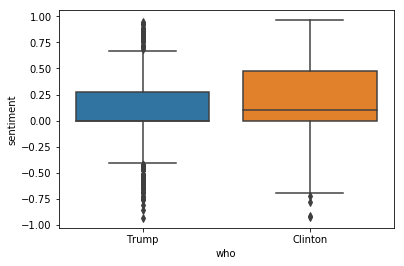

In [494]:
import seaborn as sns
sns.boxplot(x=sentiment_df.who, y=sentiment_df.sentiment)